# Predictive Modelling (Day 8): Classification

**Classification** is a technique where we categorize data into a given number of classes. The main goal of a classification problem is to identify the category/class to which a new data will fall under. Classification is **supervised learning technique**.


Terminology:
- **Classifier**: an algorithm that maps the input data to a specific category.
- **Classification model**: A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.
- **Feature**: A feature is an individual measurable property of a phenomenon being observed.

There are different types of classification: **binary** (2 classes), **multi-class** (>2 classes) and **multi-label** (>1 classes are assigned to an object).

In [2]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import seaborn as sns

## Binary Classification

Let us look at data regarding coronary heart disease (CHD) in South Africa.
The columns of the dataset:
- **sbp**: systolic blood pressure
- **tobacco**: cumulative tobacco (kg)
- **ldl**: low densiity lipoprotein cholesterol
- **adiposity**: severe or morbid overweight
- **famhist**: family history of heart disease (Present - 1, Absent - 0)
- **typea**: type-A behavior
- **obesity**: abnormal or excessive fat accumulation
- **alcohol**: current alcohol consumption
- **age**: age at onset
- **chd**: response, coronary heart disease ($target$ variable)

*The goal* is to predict coronary heart desease (CHD) based on other attributes.

In [3]:
heart = pd.read_csv(r'SAHeart.csv', sep=',', header=0)

In [4]:
heart.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


First, let us calculate the total number of observations for each class

In [5]:
heart.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

![balanced data](https://miro.medium.com/max/450/1*zsyN08VVrgHbAEdvv27Pyw.png "Balanced And Imbalanced Datasets")

In general, if there are two classes, then *balanced data* would mean 50% points for each of the class. 

We can observe in our data that **65%** of people have no desease while **35%** of people have no desease. In our case there is a little imbalance in our data which should not cause any significant performance degradation. 

However, you should remember that **if the class imbalance is high** (e.g. 90% points for one class and 10% for the other), **standard optimization criteria or performance measures may not be as effective and would need modification**.


First, let us separates the data frame into a `y` vector of the response and an `X` matrix of explanatory variables:

In [6]:
y = heart.iloc[:,10]
X = heart.iloc[:,:9]

In [8]:
X

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34
...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,0,64,28.45,0.00
458,460,182,4.20,4.41,32.10,0,52,28.61,18.72
459,461,108,3.00,1.59,15.23,0,40,20.09,26.64
460,462,118,5.40,11.61,30.79,0,64,27.35,23.97


The following are the steps involved in building a classification model:

- **Initialize** the classifier to be used.
- **Train** the classifier: All classifiers in scikit-learn uses a fit(X, y) method to fit the model(training) for the given train data X and train label y.
- **Predict** the target: Given an unlabeled observation X, the predict(X) returns the predicted label y.
- **Evaluate** the classifier model

### 1. Logistic regression
Logistic Regression is a type of Generalized Linear Model (GLM) that uses a logistic function to model a binary variable based on any kind of independent variables.

In [9]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000).fit(X, y)

Get predicted labels

In [10]:
LR.predict(X)

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

Get predictions (probabilities)

In [11]:
LR.predict_proba(X)

array([[0.25658982, 0.74341018],
       [0.7921106 , 0.2078894 ],
       [0.65844991, 0.34155009],
       [0.212688  , 0.787312  ],
       [0.22961532, 0.77038468],
       [0.25336953, 0.74663047],
       [0.727844  , 0.272156  ],
       [0.60409994, 0.39590006],
       [0.77534799, 0.22465201],
       [0.44453593, 0.55546407],
       [0.30529348, 0.69470652],
       [0.17381692, 0.82618308],
       [0.92545501, 0.07454499],
       [0.91446606, 0.08553394],
       [0.58586027, 0.41413973],
       [0.75969955, 0.24030045],
       [0.26896603, 0.73103397],
       [0.09778543, 0.90221457],
       [0.24919413, 0.75080587],
       [0.21707502, 0.78292498],
       [0.85909604, 0.14090396],
       [0.48109645, 0.51890355],
       [0.23160481, 0.76839519],
       [0.81477202, 0.18522798],
       [0.32665277, 0.67334723],
       [0.12230873, 0.87769127],
       [0.68363622, 0.31636378],
       [0.33142875, 0.66857125],
       [0.36379103, 0.63620897],
       [0.72181145, 0.27818855],
       [0.

Get the score (average accuracy) of the model

In [12]:
LR.score(X,y)

0.7359307359307359

Get the confusion matrix

In [13]:
confusion_matrix(y, LR.predict(X))

array([[262,  40],
       [ 82,  78]])

Get the F-score of the model

In [14]:
f1_score(y, LR.predict(X))

0.5611510791366906

### 2. K-Nearest Neighbours
According to K-Nearest Neighbours algorithm, classification is computed from a simple majority vote of the k nearest neighbours of each point.

In [15]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X,y)

KNeighborsClassifier()

In [16]:
knn.predict(X)

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

Compute the accuracy and F1-score

In [17]:
print("Accuracy is", knn.score(X,y))
print("F-1 score is", f1_score(y, knn.predict(X)))

Accuracy is 0.7359307359307359
F-1 score is 0.5234375


### 3. Decision Tree
Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.


In [18]:
dtree = DecisionTreeClassifier(max_depth = 5, random_state = 101, min_samples_leaf = 5)
dtree.fit(X,y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=101)

In [19]:
dtree.predict(X)

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [20]:
print("Accuracy is", dtree.score(X,y))
print("F-1 score is", f1_score(y, dtree.predict(X)))

Accuracy is 0.7835497835497836
F-1 score is 0.6551724137931033


### 4. Random Forest
Random Forests are an ensemble learning method that fit multiple Decision Trees on subsets of the data and average the results. 

In [21]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

Get predictions

In [22]:
RF.predict(X)

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

Compute the accuracy and F1-score

In [23]:
print("Accuracy is", RF.score(X,y))
print("F-1 score is", f1_score(y, RF.predict(X)))

Accuracy is 0.7207792207792207
F-1 score is 0.3827751196172249


### 5. Support Vector Machines
Support Vector Machines (SVMs) are a type of classification algorithm that are more flexible - they can do linear classification, but can use other non-linear basis functions. The following example uses a linear classifier to fit a hyperplane that separates the data into two classes. To apply SVM, you may call `LinearSVC` or `SVC`.

In [24]:
SVM = sk.svm.SVC(kernel='linear')
SVM.fit(X, y)

SVC(kernel='linear')

In [41]:
SVM.predict(X)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Compute the accuracy and F-1 score

In [45]:
print("Accuracy is", SVM.score(X,y))
# print("F-1 score is", f1_score(y, SVM.predict(X)))

Accuracy is 0.3220338983050847


### 6. Neural Networks
Neural Networks are a machine learning algorithm that involves fitting many hidden layers used to represent neurons that are connected with synaptic activation functions. These essentially use a very simplified model of the brain to model and predict data.

One can use `sklearn` library for neural networks, however libraries such as `Tensorflow` and `Keras` are more suited to fitting and customizing neural networks. We will try these libraries next week.

In [46]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [47]:
NN.predict(X)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Compute the accuracy and F-1 score

In [48]:
print("Accuracy is", NN.score(X,y))
print("F-1 score is", f1_score(y, NN.predict(X)))

Accuracy is 0.3220338983050847


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### 7. Naive Bayes

Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features.

In [49]:
nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

In [50]:
nb.predict(X)

array([1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 4, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

Compute the accuracy and F-1 score

In [51]:
print("Accuracy is", nb.score(X,y))
print("F-1 score is", f1_score(y, nb.predict(X)))

Accuracy is 0.847457627118644


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Other classifiers

**8. Stochastic Gradient Descent**

Stochastic gradient descent is a simple and very efficient approach to fit linear models. It is particularly useful when the number of samples is very large. It supports different loss functions and penalties for classification.

In [52]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(X,y)

SGDClassifier(loss='modified_huber', random_state=101)

Compute the accuracy and F-1 score

In [53]:
print("Accuracy is", sgd.score(X,y))
print("F-1 score is", f1_score(y, sgd.predict(X)))

Accuracy is 0.3728813559322034


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

**9. XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It is an implementation of the Gradient Boosted Decision Trees algorithm. **The idea** is that it go through cycles that repeatedly builds new models and combines them into an ensemble model. XGBoost models dominate many Kaggle competitions.

More information is available [here](https://www.kaggle.com/dansbecker/xgboost).

In [54]:
xgb = XGBClassifier()
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Compute the accuracy and F-1 score

In [55]:
print("Accuracy is", xgb.score(X,y))
print("F-1 score is", f1_score(y, xgb.predict(X)))

Accuracy is 1.0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

**10. Linear Discriminant Analysis**

In [56]:
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [57]:
Compute the accuracy and F-1 score

SyntaxError: invalid syntax (<ipython-input-57-24500201d9d9>, line 1)

In [58]:
print("Accuracy is", xgb.score(X,y))
print("F-1 score is", f1_score(y, xgb.predict(X)))

Accuracy is 1.0


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Comparison of the results

In [59]:
results = [[precision_score(y, LR.predict(X)), recall_score(y, LR.predict(X)), LR.score(X,y), f1_score(y, LR.predict(X))],
           [precision_score(y, knn.predict(X)), recall_score(y, knn.predict(X)), knn.score(X,y), f1_score(y, knn.predict(X))],
           [precision_score(y, dtree.predict(X)), recall_score(y, dtree.predict(X)), dtree.score(X,y), f1_score(y, dtree.predict(X))],
           [precision_score(y, RF.predict(X)), recall_score(y, RF.predict(X)), RF.score(X,y), f1_score(y, RF.predict(X))],
           [precision_score(y, SVM.predict(X)), recall_score(y, SVM.predict(X)), SVM.score(X,y), f1_score(y, SVM.predict(X))],
           [precision_score(y, NN.predict(X)), recall_score(y, NN.predict(X)), NN.score(X,y), f1_score(y, NN.predict(X))],
           [precision_score(y, nb.predict(X)), recall_score(y, nb.predict(X)), nb.score(X,y), f1_score(y, nb.predict(X))],
           [precision_score(y, sgd.predict(X)), recall_score(y, sgd.predict(X)), sgd.score(X,y), f1_score(y, sgd.predict(X))],
           [precision_score(y, xgb.predict(X)), recall_score(y, xgb.predict(X)), xgb.score(X,y), f1_score(y, xgb.predict(X))],
           [precision_score(y, lda.predict(X)), recall_score(y, lda.predict(X)), lda.score(X,y), f1_score(y, lda.predict(X))]]

df = pd.DataFrame(data=results, 
                  index=["Logistic Regression", "K-Nearest Neighbours", "Decision Tree", "Random Forest",
                        "SVM", "Neural Networks", "Naive Bayes", "SGD", "XGBoost", "Linear Discriminant Analysis"], 
                  columns=["Precision", "Recall", "Accuracy", "F1-score"])
df['label'] = df.index

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [60]:
df

NameError: name 'df' is not defined

In [61]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

        
def drawScatter(df, col1, col2, label="label"):
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize = (8,8))
    ax = fig.gca()
    label_point(df[col1], df[col2], df.label, ax)
    df.plot.scatter(x=col1, y=col2, ax=ax)

In [62]:
drawScatter(df, 'Precision', 'Recall')

NameError: name 'df' is not defined

In [63]:
drawScatter(df, 'Accuracy', 'F1-score')

NameError: name 'df' is not defined

## Multi-class Classification
Let us consider the fruits dataset (fruit_data_with_colors.txt) which contains a few dozen oranges, lemons and apples of different varieties and their measurements.

In [64]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


We have 59 pieces of fruits and 7 features in the dataset:

In [65]:
print(fruits.shape)

(59, 7)


In [66]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


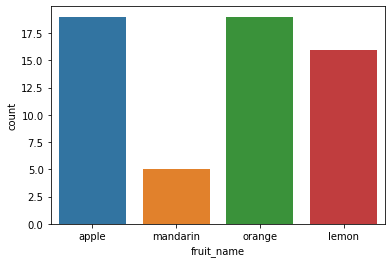

In [29]:
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

We can see that our data is more or less balanced, thus, no additional techniques are required.

Let us draw some histograms.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1, 'List of histograms')

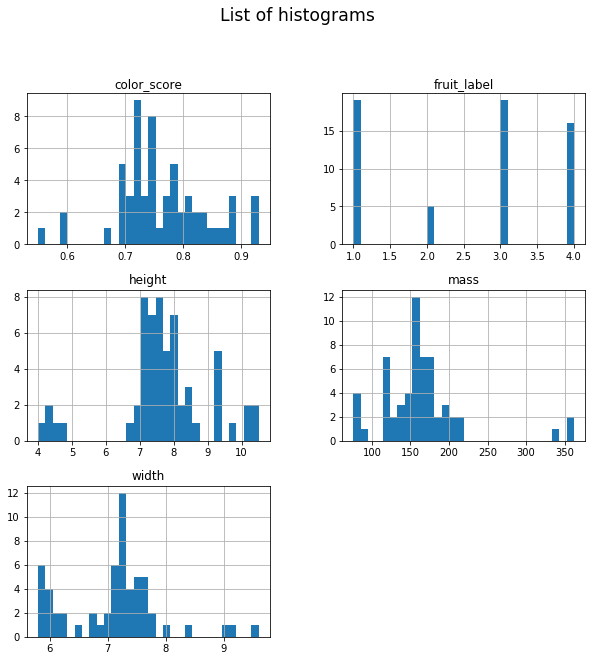

In [30]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
fruits.hist(ax = ax, bins=30)
plt.suptitle('List of histograms', x=0.5, y=1, ha='center', fontsize='xx-large')

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

In [31]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

### Create Training and Test Sets and Apply Scaling

The split of the dataset is performed using the `train_test_split` methods which is a part of `sklearn` package. By default, the data is divided into 2 parts: training set (75%) and test set (25%). However, it is also possible to set the size of the dataset (e.g., input parameter `test_size=0.3` which corresponds to 30% splitting).

In [32]:
y = fruits.iloc[:,0]
X = fruits.iloc[:,3:]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Next, let us rescale our data.
`MinMaxScaler` estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build Models

We use the training set to learn the model.

In [35]:
#1. LR
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=1000)
LR.fit(X_train, y_train)

#2. knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

#3. Desicion tree
dtree = DecisionTreeClassifier(max_depth = 5, random_state = 101, min_samples_leaf = 5)
dtree.fit(X_train, y_train)

#4. Random Forest
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)

#5. SVM
SVM = sk.svm.SVC(kernel='linear')
SVM.fit(X_train, y_train)

#7. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

#8. SGD
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(X_train, y_train)

#9. XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

#10. LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [36]:
print('Accuracy of LR classifier', LR.score(X_test,y_test))
print('Accuracy of KNN classifier', knn.score(X_test,y_test))
print('Accuracy of Desicion tree classifier', dtree.score(X_test,y_test))
print('Accuracy of Random Forest classifier', RF.score(X_test,y_test))
print('Accuracy of SVM classifier', SVM.score(X_test,y_test))
print('Accuracy of Naive Bayes classifier', nb.score(X_test,y_test))
print('Accuracy of SGD classifier', sgd.score(X_test,y_test))
print('Accuracy of XGBoost classifier', xgb.score(X_test,y_test))
print('Accuracy of LDA classifier', lda.score(X_test,y_test))

Accuracy of LR classifier 0.4666666666666667
Accuracy of KNN classifier 1.0
Accuracy of Desicion tree classifier 0.7333333333333333
Accuracy of Random Forest classifier 0.8
Accuracy of SVM classifier 0.5333333333333333
Accuracy of Naive Bayes classifier 0.6666666666666666
Accuracy of SGD classifier 0.5333333333333333
Accuracy of XGBoost classifier 0.8
Accuracy of LDA classifier 0.6666666666666666


The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of no error made on the test set. However, the test set was very small.

In [37]:
pred = knn.predict(X_test)
print(pred)

[3 3 4 3 1 1 3 4 3 1 2 1 3 3 3]


One can also construct the confusion matrix and classification report

In [38]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## Additional: Define the optimal number of neighbors

([<matplotlib.axis.XTick at 0x7fc9206425d0>,
 <a list of 5 Text xticklabel objects>)

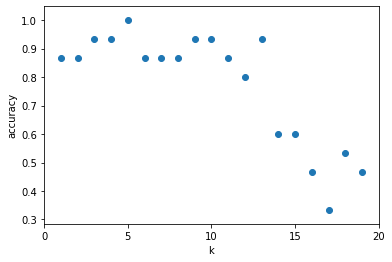

In [39]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## Sensitivity to the size of the training set

In [40]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

NameError: name 'np' is not defined

<Figure size 432x288 with 0 Axes>

## Additional: Plot the Decision Boundary of the k-NN Classifier

In [ ]:
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
           % (n_neighbors, weights))    
    plt.show()

plot_fruit_knn(X_train[['height', 'width']], y_train, 5, 'uniform')

# k-Fold Cross-Validation

The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.

A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results.

Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

#### Step 1. Create/Load Dataset
Let us apply k-fold cross-validation procedure to a synthetic classification dataset.

In [ ]:
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

#### Step 2. Set the parameter k

Assume k = 10

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#### Step 3. Define the model
Consider the logistic regression model

In [ ]:
model = LogisticRegression()

#### Step 4. Perform cross-validation and evaluate the model

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
y_pred = cross_val_predict(model, X, y, cv=cv)

In [ ]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Return the scores for each iteration

In [ ]:
scores

## Bonus: Manual cross validation

Initialize cross-validation and define the model

In [ ]:
cv = KFold(n_splits=10, shuffle=True)
model = LogisticRegression()

Make manual iteration

In [ ]:
scores = []
X = pd.DataFrame(X)
y = pd.DataFrame(y)
for i in range(10):
    result = next(cv.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = model.fit(x_train, y_train.values.ravel())
    #predictions = model.predict(x_test)
    scores.append(model.score(x_test, y_test))
print(scores)

k-Fold Cross-Validation

In [ ]:
y_pred

# Repeated Cross-Validation

The estimate of model performance via k-fold cross-validation can be noisy.

This means that each time the procedure is run, a different split of the dataset into k-folds can be implemented, and in turn, the distribution of performance scores can be different, resulting in a different mean estimate of model performance.

One solution to reduce the noise in the estimated model performance is to increase the k-value. This will reduce the bias in the model’s estimated performance, although it will increase the variance: e.g. tie the result more to the specific dataset used in the evaluation.

The `scikit-learn` Python machine learning library provides an implementation of repeated k-fold cross-validation via the `RepeatedKFold` class.

The main parameters are the number of folds (n_splits), which is the “k” in k-fold cross-validation, and the number of repeats (n_repeats).

A good default for k is k=10.

In [ ]:
from sklearn.model_selection import RepeatedKFold
cvR = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cvR, n_jobs=-1)

In [ ]:
print(scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

### Main results about cross-validation
- The mean performance reported from a single run of k-fold cross-validation may be noisy.
- Repeated k-fold cross-validation provides a way to reduce the error in the estimate of mean model performance.
- How to evaluate machine learning models using repeated k-fold cross-validation in Python.

# Imbalanced Data

Imbalanced classes is a surprisingly common problem in machine learning (specifically in classification), occurring in datasets with a disproportionate ratio of observations in each class.

**Standard accuracy no longer reliably measures performance, which makes model training much trickier.**

Imbalanced classes appear in many domains, including:

- Fraud detection
- Spam filtering
- Disease screening
- SaaS subscription churn
- Advertising click-throughs

Thus, there is a need to explore **effective ways** to handle imbalanced classes.

Let us use a synthetic dataset called *Balance Scale Data* (available at UCI Machine Learning Repository). The dataset contains information about whether a scale is balanced or not, based on weights and distances of the two arms.
![Balance Scale Data](https://elitedatascience.com/wp-content/uploads/2017/06/balance-scale-data.png "Balance Scale Data")


In [ ]:
df = pd.read_csv('balance-scale.data', 
                 names=['balance', 'var1', 'var2', 'var3', 'var4'])
df

The target variable has 3 classes.

In [ ]:
df['balance'].value_counts()

Assume, we turn the data this into **a binary classification problem**. We're going to label each observation as 1 (positive class) if the scale is balanced or 0 (negative class) if the scale is not balanced:

In [ ]:
df['balance'] = [1 if b=='B' else 0 for b in df.balance]
df['balance'].value_counts()

As you can see, only about 8% of the observations were balanced. Therefore, **if we were to always predict 0, we'd achieve an accuracy of 92%.**

## The Danger of Imbalanced Classes
Let us apply the Logistic Regression algorithm to the data

In [ ]:
y = df.balance
X = df.drop('balance', axis=1)

LR = LogisticRegression().fit(X, y)

Let us now make the prediction and evaluate the accuracy

In [ ]:
pred_y_0 = LR.predict(X)
print(accuracy_score(pred_y_0, y))

So our model has 92% overall accuracy, but is it because it's predicting only 1 class?

In [ ]:
pred_y_0

As you can see, this model is only predicting 0, which means it's completely ignoring the minority class in favor of the majority class.

Next, we'll look at **some techniques for handling imbalanced classes**.

![Resampling Techniques](https://miro.medium.com/max/725/1*H6XodlitlGDl9YdbwaZLMw.png "Resampling Techniques")



## 1. Up-sample Minority Class

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.


There are several heuristics for doing so, but the most common way is to simply resample with replacement.

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.balance.value_counts()

Let us now apply the model

In [ ]:
# Separate input features (X) and target variable (y)
y = df_upsampled.balance
X = df_upsampled.drop('balance', axis=1)

# Train model
LR1 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_1 = LR1.predict(X)
 
# Is our model still predicting just one class?
print(np.unique( pred_y_1 ))
# [0 1]
 
# How's our accuracy?
print( accuracy_score(y, pred_y_1) )

Great, now the model is no longer predicting just one class. While the accuracy also took a nosedive, it's now more meaningful as a performance metric.

## 2. Down-sample Majority Class

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

In [ ]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.balance.value_counts()

Let us now apply the model

In [ ]:
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis=1)
 
# Train model
LR2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = LR2.predict(X)
 
# Is our model still predicting just one class?
print(np.unique(pred_y_2))
 
# How's our accuracy?
print(accuracy_score(y, pred_y_2) )

The model isn't predicting just one class, and the accuracy seems higher.

## 3. Change Your Performance Metric

For a general-purpose metric for classification, we recommend Area Under ROC Curve (AUROC). Intuitively, AUROC represents the likelihood of your model distinguishing observations from two classes.


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Predict class probabilities
prob_y_2 = LR2.predict_proba(X)

# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

prob_y_2

In [ ]:
print(roc_auc_score(y, prob_y_2))

Let us compare to the original model trained on the imbalanced dataset

In [ ]:
prob_y_0 = LR.predict_proba(X)
prob_y_0 = [p[0] for p in prob_y_0] # AUROC should be >= 0.5. If you got <0.5, you should change p[0] to p[1]
 
print(roc_auc_score(y, prob_y_0))

In [ ]:
We can observe that AUROC is higher for LR2 (Down-sampling) compared to the initial model.

## 4. Use Penalize Algorithms (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

In [ ]:
from sklearn.svm import SVC
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
model3 = SVC(kernel='linear', 
            class_weight='balanced', # penalize proportianally to the size of the classes
            probability=True)
 
model3.fit(X, y)
 
# Predict on training set
pred_y_3 = model3.predict(X)
 
# Is our model still predicting just one class?
print("Predicted classes", np.unique( pred_y_3 ))

# How's our accuracy?
print("Accuracy", accuracy_score(y, pred_y_3))

# What about AUROC?
prob_y_3 = model3.predict_proba(X)
prob_y_3 = [p[0] for p in prob_y_3]
print("AUROC is",roc_auc_score(y, prob_y_3))

## 5. Use Tree-Based Algorithms
The final tactic we'll consider is using tree-based algorithms. Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.

In [ ]:
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
model4 = RandomForestClassifier()
model4.fit(X, y)
 
# Predict on training set
pred_y_4 = model4.predict(X)
 
# Is our model still predicting just one class?
print("Predicted classes", np.unique(pred_y_4 ))
 
# How's our accuracy?
print("Accuracy", accuracy_score(y, pred_y_4))
# 0.9744
 
# What about AUROC?
prob_y_4 = model4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print("AUROC is", roc_auc_score(y, prob_y_4) )

Well, tree ensembles have become very popular because they perform extremely well on many real-world problems. We certainly recommend them wholeheartedly.

**However:**

While these results are encouraging, the model could be **overfit**, so you should still evaluate your model on an unseen test set before making the final decision.

# Exercise
Consider the BykeBuyer dataset (BykeBuyer.xls, available at LMS system). Divide the dataset into the test and training data. Predict byke buyers using various classification models. Evaluate the performance of the models (classification scores + repeated k-cross-validation).